# 周波数解析の簡単な解説

## 1. NumpyにおけるFFTの関数

***
### 【公式1】NumpyのFFT
サンプルリング周波数$H$Hzの時系列データ配列（1D-numpy配列が望ましい）で，うまく$2^n$（$n$は自然数）個の要素に切り取られた配列を`arr`とする。そのとき，Numpy関数`np.fft.fft`を用いて
```
F_arr = np.fft.fft(arr)/len(arr)
```
として得られた`F_arr`は，`arr`を離散**フーリエ変換**した配列である。ここで右辺の`F_arr`は`arr`と**同じ要素数**`len(arr)`$=2^n$の**複素数**を要素にもつ配列である。  
　　`k = 0, 1, 2, ...`に対して，`F_arr[k]`はデータ`arr`の周波数$\frac{H}{2^n}k$[Hz]のスペクトルとよばれる。なお，`F_arr[0]`は`arr`の平均値（実数）に等しく，直流成分とよばれる。
> 1. 厳密には，この時系列データは周期関数的に変動することが仮定されている。
2. `len(arr)`が$2^n$**でない**ときでも，関数`np.fft.fft`は`arr`のFFTを行う。しかし，より正確かつ高速にFFTを行うには，`len(arr)`$=2^n$であるのが望ましい（でなければならない）。
3. 離散フーリエ変換の定義の違いによって，配列`arr`の要素数`len(arr)`$=2^n$で除さないときもある。Numpyでは`len(arr)`$=2^n$で除さないものを離散フーリエ変換の定義にしていることに注意。

***
### 【公式2】Numpyの逆FFT
サンプルリング周波数$H$Hzの時系列データ配列（1D-numpy配列が望ましい）で，うまく$2^n$（$n$は自然数）個の要素に切り取られた配列を`arr`とし，`arr`公式1のようにスペクトル配列`F_arr`にスペクトル分解されていたとする。そのとき，`F_arr`は次の公式によって，元のデータ配列`arr`に戻すことができる：
```
arr = np.fft.ifft(F_arr)
```
`arr`は，`F_arr`を離散**逆フーリエ変換**した配列である。ここで右辺の`arr`は`F_arr`と**同じ要素数**`len(F_arr)`$=2^n$の**複素数**を要素にもつ配列である。  
　　データ`arr`は原信号と呼ばれ，`arr[l]`のindex `l = 0, 1, 2, ...`はサインプリング開始時刻を$0$としてそれぞれ，`t` = $0, \frac{1}{H}, \frac{2}{H}, ..., \frac{l}{H}, ..., \frac{2^n-1}{H} $[sec]である。
***

## 2. FFTの解説 
　ここではコンピュータで扱う**高速離散フーリエ変換（FFT）**の解説を行うので，時系列データの**サンプリング数（要素数）を特殊なケースの$2^n$にとる**が，一般の離散フーリエ変換（DFT）のサンプリング数は$N(>H)$でよい（$H$はサンプリング周波数）。  
 
　有名な**オイラーの公式**：$e^{i\theta}=\cos\theta+i\sin\theta$（ここで，$i=\sqrt{-1}$）を用いるが，この公式ぐらい暗記しておいても損はない。また，$e^{i\theta}$の**複素共役**は，$\cos\theta-i\sin\theta=\cos(-\theta)+i\sin(-\theta)=e^{-i\theta}$であることも付け加えておく。  

　簡単のため，サンプリング開始時刻$t_0$を$0$とし，十分大きな$2^n$（$n$は自然数）をとって，サンプリング周波数$H$のデータの時刻$t$が，等間隔に$t$ $\simeq \{ t_0, t_1, t_2, ...,t_l,..., t_{2^n-1} \}$ $=\{ 0, t_1, t_2, ...,t_l,..., t_{2^n-1} \}$と離散化されているとする。ここで，$\tau$ $:=$ $1/H$ $=t_1-t_0$ $(=t_1-0)$ $=t_2-t_1$ $=...=t_l-t_{l-1}$ $=...=t_{2^n-1}-t_{2^n-2}$とおく。そうすると，実数データ$\xi(t)$も離散化されて，$\xi = \xi(t)$ $\simeq \{\xi(t_0), \xi(t_1), \xi(t_2), ..., \xi(t_l),...,\xi(t_{2^n-1}) \}$ $= \{\xi(0), \xi(\tau), \xi(2\tau), ..., \xi(l\tau),...,\xi((2^n-1)\tau) \}$$=:\{\xi_0, \xi_1, \xi_2, ..., \xi_l,...,\xi_{2^n-1} \}$となる。

　さて，$\xi_l\ \ (l=0,1,2,...,2^{n}-1)$は，

$$
\xi_l=F_0+F_1e^{2\pi i\frac{1l}{2^n}}+F_2e^{2\pi i\frac{2l}{2^n}}+...
+F_ke^{2\pi i\frac{kl}{2^n}}+...+F_{2^n-1}e^{2\pi i\frac{(2^n-1)l}{2^n}}
\tag{1}
\\=\sum_{k=0}^{2^n-1}F_ke^{2\pi i\frac{kl}{2^n}}
$$

と分解できることがわかっている。ここで，$l$はデータ番号といわれ，時刻$t_0+l\tau$データを表す添字である。この$F_k$を，データ$\xi$の周波数$\frac{H}{2^n}k(=\frac{1}{2^n \tau}k)$のスペクトルといい，$(1)$をフーリエ逆変換という。  
　$F_0$は実数で

$$F_0=\frac{1}{2^n}(\xi_0+\xi_1+\xi_2+...+\xi_{2^{n-1}}+...+\xi_{2^n-1})\\
=\frac{1}{2^n}\sum_{k=0}^{2^n-1}\xi_{k}=:a_0. \tag{2}$$

つまり$F_0=a_0$は全データの平均であり，したがって実数である。  
　$F_0$を除いた$\{F_1, F_2, ..., F_{2^n}\}$のちょうど中間に位置する$F_{2^{n-1}}(=F_{\frac{2^n}{2}})$もまた実数で，

$$F_{2^{n-1}}=\frac{1}{2^n}(\xi_0-\xi_1+\xi_2-\xi_3+...-\xi_{2^{n-1}-1}+\xi_{2^{n-1}}-\xi_{2^{n-1}+1}+...+\xi_{2^n-2}-\xi_{2^n-1})\\
=\frac{1}{2^n}\sum_{k=0}^{2^n-1}(-1)^k\xi_{k}=:a_{2^{n-1}} \tag{3}$$

で与えられる。これをスペクトルのナイキスト成分といい，このときの周波数$\frac{H}{2}=\frac{1}{2\tau}$をナイキスト周波数とよぶ。$(1)$における，$F_{2^{n-1}}=a_{2^{n-1}}$の係数は

$$
e^{2\pi i\frac{2^{n-1}l}{2^n}}=\cos(2\pi \frac{2^{n-1}l}{2^n})+i\sin(2\pi \frac{2^{n-1}l}{2^n})=\cos(\pi l)=(-1)^l \tag{4}
$$

で，これも実数である。 ここで，$\sin(\pi l)=0$に注意せよ。後の便宜のため，$(1)$における$F_{2^{n-1}}$の項を

$$
F_{2^{n-1}}e^{2\pi i\frac{2^{n-1}l}{2^n}}=a_{2^{n-1}}\cos(\pi l)
=a_{2^{n-1}}\cos(2\pi \frac{2^{n-1}l}{2^n})+ib_{2^{n-1}}\sin(2\pi \frac{2^{n-1}l}{2^n}) \tag{5}
$$

としておこう。  
　その他の$F_k$は一般的に複素数なので，

$$F_k =: a_k-ib_k \tag{6}$$ 

とおける。ここで，$a_k,\ b_k$は実数。そうすると，

$$
a_k=\frac{1}{2^n}\sum_{l=0}^{2^n-1} \xi_l \cos(\frac{2\pi kl}{2^n}),\ \ 
b_k=\frac{1}{2^n}\sum_{l=0}^{2^n-1} \xi_l \sin(\frac{2\pi kl}{2^n}) \tag{7}
$$

と書けることがわかっている。$(7)$の２つの式の右辺は気にするな。重要なのは，$0<k<2^{n-1}$で  

$$F_{2^n-k}=\overline{F_k}=a_k+ib_k \tag{8}$$

となることだ（$\cos$が偶関数，$\sin$が奇関数からこのことはほとんど自明）。ここで，記号の上に引いてあるバーは，それの複素共役を示している。$(8)$の関係式は，$(1)$の$a_0,\ a_{2^{n-1}}$の項以外の項の和が実数てあることを保証する（エルミート性）。実際，$(1)$における$F_k$の項と$F_{2^n-k}$の項の和は，

$$
F_{k}e^{2\pi i\frac{kl}{2^n}}+F_{2^n-k}e^{2\pi i\frac{(2^n-k)l}{2^n}}
=F_{k}e^{2\pi i\frac{kl}{2^n}}+\overline{F_k}e^{-2\pi i\frac{kl}{2^n}}\\
=F_{k}e^{2\pi i\frac{kl}{2^n}}+\overline{F_ke^{2\pi i\frac{kl}{2^n}}}\\
=2a_k\cos(\frac{2\pi kl}{2^n})+2b_k\sin(\frac{2\pi kl}{2^n}) \tag{9}
$$

となり，実数である。  
　$(2),(3),(5),(9)$から，$(1)$は

$$
\xi_l = \xi(l\tau) =\xi(t_l)
\\
$$

$$
=a_0 +
\bigr\{2a_1\cos(\frac{2\pi 1l}{2^n})+2b_1\sin(\frac{2\pi 1l}{2^n})\bigr\}\\
+\bigr\{2a_2\cos(\frac{2\pi 2l}{2^n})+2b_2\sin(\frac{2\pi 2l}{2^n})\bigr\}+...\\
...+\bigr\{2a_k\cos(\frac{2\pi kl}{2^n})+2b_k\sin(\frac{2\pi kl}{2^n})\bigr\}+...\\
...+\bigr\{2a_{2^{n-1}}\cos(\frac{2\pi 2^{n-1}l}{2^n})+2b_{2^{n-1}}\sin(\frac{2\pi 2^{n-1}l}{2^n})\bigr\}\\
$$

$$
=a_0 +
\bigr\{2a_1\cos(2\pi\frac{H}{2^n}t_l)+2b_1\sin(2\pi\frac{H}{2^n}t_l)\bigr\}\\
+\bigr\{2a_2\cos(2\pi\frac{2H}{2^n}t_l)+2b_2\sin(2\pi\frac{2H}{2^n}t_l)\bigr\}+...\\
...+\bigr\{2a_k\cos(2\pi\frac{kH}{2^n}t_l)+2b_k\sin(2\pi\frac{kH}{2^n}t_l)\bigr\}+...\\
...+\bigr\{2a_{2^{n-1}}\cos(2\pi\frac{2^{n-1}H}{2^n}t_l)+2b_{2^{n-1}}\sin(2\pi\frac{2^{n-1}H}{2^n}t_l)\bigr\}  \tag{10}
$$

ここで，$H=1/\tau,\ l\tau=t_l\ \rightarrow \ l=Ht_l$を使った。$(10)$より，離散時系列データ$\xi$の任意の時刻$t_l$におけるデータ点$\xi_l$は，サンプリング時間における$\xi$の平均$a_0$(周波数$0$の波)と，$k=1,2,...,2^{n-1}$として，**周波数$\frac{kH}{2^n}$をもつ振幅$2a_k$の余弦波と振幅$2b_k$の正弦波の和として展開できる**ことが解った。  

　このように $F_0,F_1,...,F_{2^{n}-1}$ は，回路またはコンピュータ上で，離散データを$(1)$または$(10)$のように展開したとき，サンプリングデータの全時刻における**平均**と**取り得る周波数の余弦波と正弦波のそれぞれの振幅の$\frac{1}{2}$を複素数を用いて表すことに等しい**。式で書くと（気にするな）：

$$
F_k=\sum_{l=0}^{2^n-1}\xi_le^{2\pi i\frac{k}{2^n}l}=\sum_{l=0}^{2^n-1}\xi_le^{2\pi i\frac{kH}{2^n}l\tau}
\ \ \ (k=0,1,2,...,2^n-1)\\
\mathrm{or}\\
F(\frac{kH}{2^n})=\sum_{l=0}^{2^n-1}\xi(t_l)e^{2\pi i\frac{kH}{2^n}t_l} \tag{11}.
$$

式$(11)$を高速離散フーリエ変換(FFT)という。  
　こうして，【公式１】は，**要素数$2^n$**のデータ`arr`について，  
 - `F_arr[0]`は`arr`の平均を与える。
 - `F_arr[1]`は周波数$\frac{H}{2^n}$の`arr`の余弦波(実数成分)の振幅の$\frac{1}{2}$と正弦波の振幅(虚数成分)の$\frac{1}{2}$を与える。
 - `F_arr[2]`は周波数$\frac{2H}{2^n}$の`arr`の余弦波(実数成分)の振幅の$\frac{1}{2}$と正弦波(虚数成分)の振幅の$\frac{1}{2}$を与える。
 - ...
 - `F_arr[` $k$ `]`は周波数$\frac{kH}{2^n}$の`arr`の余弦波(実数成分)の振幅の$\frac{1}{2}$と正弦波(虚数成分)の振幅の$\frac{1}{2}$を与える。
 - ...
 - `F_arr[` $2^{n-1}$ `]`は周波数$\frac{2^{n-1}H}{2^n}=\frac{H}{2}$（**ナイキスト周波数**）の`arr`の余弦波(実数成分)の振幅の$\frac{1}{2}$と正弦波(虚数成分)の振幅の$\frac{1}{2}$を与える（実際には実数成分，つまり余弦波の振幅しかない）。
 - これ以降は順に，`F_arr[` $2^{n-1}-1$ `]`, ... , `F_arr[1]`の複素共役である。  
余弦波
　データの$\{\xi_l\}$の各$F_k$の絶対値の２乗  
 
$$
P_k=\mid F_k \mid ^2 \tag{12}
$$

を周波数$\frac{kl}{2^n}$の**パワー(Power)**という。これは，データ$\{\xi_l\}$をスペクトル分解したときの周波数$\frac{kl}{2^n}$の強度を表す。
 ***

## 3. 解析例

◼️3-1. 必要なモジュールをインポートする：

In [1]:
import numpy as np
import matplotlib.pyplot as plt

> ナイキスト周波数は5Hzだ。

◽︎2-3-4. `ex_arr`についてFFTをかけると：

In [7]:
F_ex_arr = np.fft.fft(ex_arr)/len(ex_arr)
print(F_ex_arr)

[ 0.4744375 +0.j         -0.05843203+0.13140334j -0.42387378+0.04421289j
 -0.02768879+0.03619817j -0.0269375 +0.025j      -0.02612358+0.64206898j
 -0.02612622+0.01058789j -0.0252556 +0.00477415j -0.0255625 +0.j
 -0.0252556 -0.00477415j -0.02612622-0.01058789j -0.02612358-0.64206898j
 -0.0269375 -0.025j      -0.02768879-0.03619817j -0.42387378-0.04421289j
 -0.05843203-0.13140334j]


> これが，`0, 0.625, 1.25, 1.875, 2.5, 3.125, 3.75, 4.375, 5.,　5.625, 6.25, 6.875, 7.5, 8.125, 8.75, 9.375Hz`の`ex_arr`のスペクトルで，`j`は$\sqrt{-1}$だ。

◽︎2-3-5. F_ex_arrにおいて，0Hzとを除いた5Hz(ナイキスト周波数)までの各成分の実数部の２倍がcos波の振幅配列，虚数部の２倍がsin波の振幅配列なので，それぞれを`A_cos`, `A_sin`とすると：

In [8]:
A_cos = np.real(F_ex_arr[1:9]) * 2
A_sin = np.imag(F_ex_arr[1:9]) * 2
print(A_cos)
print(A_sin)

[-0.11686405 -0.84774756 -0.05537758 -0.053875   -0.05224716 -0.05225244
 -0.05051121 -0.051125  ]
[0.26280668 0.08842578 0.07239633 0.05       1.28413795 0.02117578
 0.0095483  0.        ]


◽︎2-3-6. `A_cos`, `A_sin`をプロットすると（0Hzを除く）：

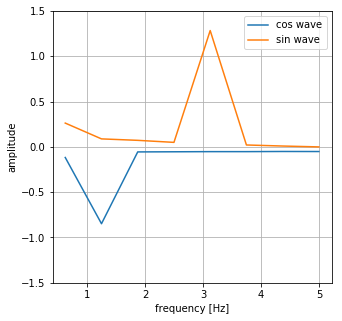

In [9]:
plt.figure(figsize=(5,5))
plt.plot(ex_fft_freq[1:9], A_cos)
plt.plot(ex_fft_freq[1:9], A_sin)
plt.legend(['cos wave', 'sin wave'])
plt.ylim([-1.5, 1.5])
plt.xlabel('frequency [Hz]')
plt.ylabel('amplitude')
plt.grid()
plt.show()

> cos波の振幅は1.25Hz, sin波の振幅は3.125Hzにピークが現れている。

◽︎2-3-7. `F_ex_arr`のパワー`P_ex_arr`は，

In [10]:
P_ex_arr = np.abs(F_ex_arr)**2
print(P_ex_arr)

[0.22509094 0.02068114 0.18162376 0.00207698 0.00135063 0.41293501
 0.00079468 0.00066064 0.00065344 0.00066064 0.00079468 0.41293501
 0.00135063 0.00207698 0.18162376 0.02068114]


◽︎2-3-8. このパワーのグラフは，次のようになる：

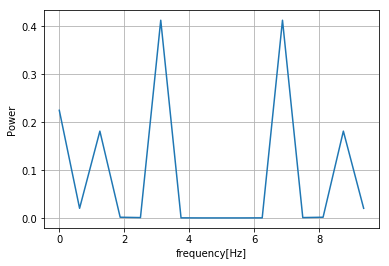

In [11]:
plt.plot(hz_vector(ex_arr, samp_hz=10), P_ex_arr)
plt.xlabel('frequency[Hz]')
plt.ylabel('Power')
plt.grid()

> スペクトル強度のピークは3.125Hz，次のピークは1.25Hzのところにある。
>> ナイキスト周波数(5Hz)を境として，それより大きいの周波数帯のパワーは無視してよい。なぜなら，後半の前半の0Hzのところを除いた周波数帯のパワーの折り返しだからである。

◼️3-2. サンプリング周波数10Hzの64(=2$^6$)個の要素を持つデータでスペクトル解析を行ってみる。

◽︎3-2-1. 次のようなデータ配列`x`を用意する：

In [12]:
x = np.array([ 3.005,  3.139,  0.887, -0.842, -0.049,  2.079,  4.781,  4.601,
               2.84 , -0.501, -2.735, -1.566,  0.656,  1.454,  1.033, -1.232,
              -3.631, -4.017, -1.245,  1.319,  3.449,  2.798,  0.481, -0.547,
               0.106,  2.153,  4.771,  5.109,  2.993, -0.146, -2.153, -1.651,
               0.613,  1.278,  1.187, -1.624, -3.804, -3.767, -1.202,  1.528,
               3.635,  3.116,  1.004, -0.896, -0.132,  2.574,  4.644,  4.777,
               2.126, -0.23 , -2.35 , -2.237,  0.671,  1.51 ,  0.579, -1.524,
              -3.596, -3.608, -1.672,  1.81 ,  3.772,  3.077,  1.137, -0.918])

▫︎3-2-2. `x`グラフは，次のようになる：

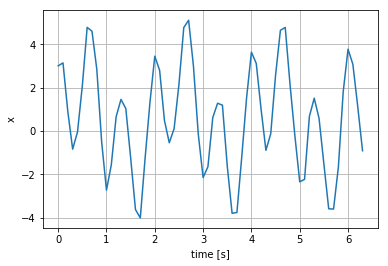

In [13]:
plt.plot(np.arange(64)/10,x)  # 第１引数はサンプルリング時刻
plt.xlabel('time [s]')
plt.ylabel('x')
plt.grid()
plt.show()

> 時刻配列は初期時刻を0[sec]とすると，`np.arange(64)/10`[sec]で与えられる。

◼️3-3. サンプリング周波数10Hzでサンリングデータ数が64であることに注意しよう。

▫︎3-3-1. FFT周波数配列を`frq`とすると：

In [42]:
frq = np.array([k*10/64 for k in range(64)])

▫︎3-3-2. `frq`の内容を見てみる：

In [43]:
frq

array([0.     , 0.15625, 0.3125 , 0.46875, 0.625  , 0.78125, 0.9375 ,
       1.09375, 1.25   , 1.40625, 1.5625 , 1.71875, 1.875  , 2.03125,
       2.1875 , 2.34375, 2.5    , 2.65625, 2.8125 , 2.96875, 3.125  ,
       3.28125, 3.4375 , 3.59375, 3.75   , 3.90625, 4.0625 , 4.21875,
       4.375  , 4.53125, 4.6875 , 4.84375, 5.     , 5.15625, 5.3125 ,
       5.46875, 5.625  , 5.78125, 5.9375 , 6.09375, 6.25   , 6.40625,
       6.5625 , 6.71875, 6.875  , 7.03125, 7.1875 , 7.34375, 7.5    ,
       7.65625, 7.8125 , 7.96875, 8.125  , 8.28125, 8.4375 , 8.59375,
       8.75   , 8.90625, 9.0625 , 9.21875, 9.375  , 9.53125, 9.6875 ,
       9.84375])

> 可能なFFT周波数は`0.`, `0.15625`, `0.3125`,..., `4.84375`, `5.`,..., `9.6875` ,`9.84375`[Hz]。このうち，`0.`[Hz]は直流周波数，`5.`[Hz]はナイキスト周波数，`9.84375`[Hz]は最大周波数である。

◽︎2-3-4. データ`x`をFFTし，可能な周波数の各スペクトルを得てみる。スペクトル配列を`F_x`とする：

In [29]:
F_x = np.fft.fft(x)/len(x)

◽︎2-3-5. `F_x`の全成分を見てみる：

In [30]:
F_x

array([ 0.60651562+0.j        ,  0.05338374-0.02641583j,
        0.13676051-0.06861002j,  0.54237422-0.66533345j,
       -0.12502297+0.30519792j, -0.04448136+0.15046563j,
       -0.05956174+0.2053842j , -0.06200979+0.1667692j ,
       -0.0857824 +0.28260584j, -0.21173226+0.69837398j,
        0.33803748-1.03779766j,  0.10896881-0.28551312j,
        0.04425647-0.18058519j,  0.02224283-0.12868357j,
        0.0431695 -0.10333967j,  0.01471997-0.065922j  ,
        0.05479688-0.07503125j,  0.08003865-0.07145435j,
        0.0203306 -0.01954396j, -0.01041401-0.0558565j ,
       -0.00815413-0.02547231j,  0.03220215-0.02807645j,
        0.084749  -0.02776028j,  0.00385495-0.04008064j,
        0.0089699 -0.01280041j,  0.00643778-0.06325663j,
        0.03350707-0.03556691j,  0.02820117+0.00616836j,
        0.03442062+0.0214358j ,  0.0173886 -0.01767039j,
        0.04338258+0.00982221j,  0.01682456+0.01380056j,
        0.07476563+0.j        ,  0.01682456-0.01380056j,
        0.04338258-0.00982221j,

> Numpyでは$\sqrt{-1}$を`j`で表すことになっている。つまり，`F_x`のすべての成分は複素数である（ただし，indexが0と32は実質的には実数である）。

◽︎2-3-6. `F_x`のindexが0の成分がデータ`x`の平均を与えているかを確かめてみる：

In [31]:
print(f'F_x[0]={F_x[0]}')
print(f'mean of x is :{np.mean(x)}')

F_x[0]=(0.6065156249999999+0j)
mean of x is :0.6065156249999999


◽︎2-3-7. ナイキスト周波数5Hzのナイキスト成分はindexが32(=64/2)の`F_x`の成分である：

In [32]:
F_x[32]

(0.074765625+0j)

> 解説の通り，実質的には実数である。

In [33]:
np.sum(x * np.array([(-1)**k for k in range(64)]))/64

0.074765625

◽︎2-3-6. 

In [34]:
a_x = np.real(F_x[1:])
a_x

array([ 0.05338374,  0.13676051,  0.54237422, -0.12502297, -0.04448136,
       -0.05956174, -0.06200979, -0.0857824 , -0.21173226,  0.33803748,
        0.10896881,  0.04425647,  0.02224283,  0.0431695 ,  0.01471997,
        0.05479688,  0.08003865,  0.0203306 , -0.01041401, -0.00815413,
        0.03220215,  0.084749  ,  0.00385495,  0.0089699 ,  0.00643778,
        0.03350707,  0.02820117,  0.03442062,  0.0173886 ,  0.04338258,
        0.01682456,  0.07476563,  0.01682456,  0.04338258,  0.0173886 ,
        0.03442062,  0.02820117,  0.03350707,  0.00643778,  0.0089699 ,
        0.00385495,  0.084749  ,  0.03220215, -0.00815413, -0.01041401,
        0.0203306 ,  0.08003865,  0.05479688,  0.01471997,  0.0431695 ,
        0.02224283,  0.04425647,  0.10896881,  0.33803748, -0.21173226,
       -0.0857824 , -0.06200979, -0.05956174, -0.04448136, -0.12502297,
        0.54237422,  0.13676051,  0.05338374])

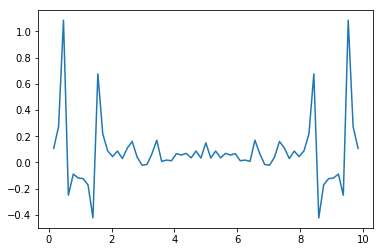

In [35]:
plt.plot(frq[1:], 2*a_x)

In [36]:
b_x = -np.imag(F_x[1:])

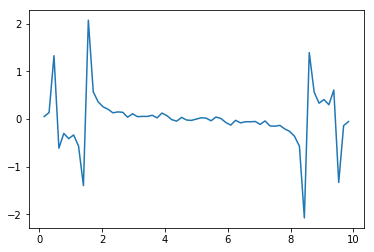

In [37]:
plt.plot(frq[1:], 2*b_x)

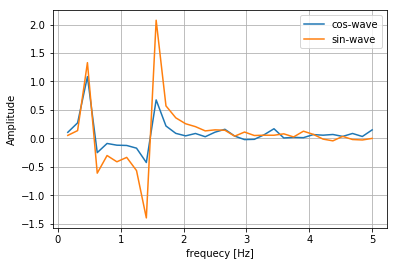

In [38]:
plt.plot(frq[1:33], 2*a_x[:32])
plt.plot(frq[1:33], 2*b_x[:32])
plt.legend(['cos-wave','sin-wave'] )
plt.xlabel('frequecy [Hz]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [39]:
P_x = np.abs(F_x)**2

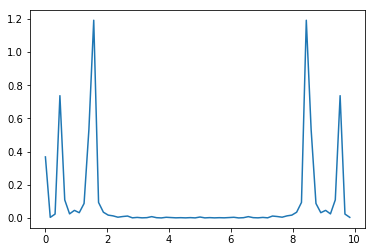

In [40]:
plt.plot(frq, P_x)

In [26]:
frq

array([0.     , 0.15625, 0.3125 , 0.46875, 0.625  , 0.78125, 0.9375 ,
       1.09375, 1.25   , 1.40625, 1.5625 , 1.71875, 1.875  , 2.03125,
       2.1875 , 2.34375, 2.5    , 2.65625, 2.8125 , 2.96875, 3.125  ,
       3.28125, 3.4375 , 3.59375, 3.75   , 3.90625, 4.0625 , 4.21875,
       4.375  , 4.53125, 4.6875 , 4.84375, 5.     , 5.15625, 5.3125 ,
       5.46875, 5.625  , 5.78125, 5.9375 , 6.09375, 6.25   , 6.40625,
       6.5625 , 6.71875, 6.875  , 7.03125, 7.1875 , 7.34375, 7.5    ,
       7.65625, 7.8125 , 7.96875, 8.125  , 8.28125, 8.4375 , 8.59375,
       8.75   , 8.90625, 9.0625 , 9.21875, 9.375  , 9.53125, 9.6875 ,
       9.84375])

In [27]:
frq[np.where(P_x==np.max(P_x))[0][0]]

1.5625

In [51]:
frq[:33][np.argsort(P_x[:33])[::-1]][:10]

array([1.5625 , 0.46875, 1.40625, 0.     , 0.625  , 1.71875, 1.25   ,
       0.9375 , 1.875  , 1.09375])

In [45]:
np.where?

Docstring:
where(condition, [x, y])

Return elements chosen from `x` or `y` depending on `condition`.

.. note::
    When only `condition` is provided, this function is a shorthand for
    ``np.asarray(condition).nonzero()``. Using `nonzero` directly should be
    preferred, as it behaves correctly for subclasses. The rest of this
    documentation covers only the case where all three arguments are
    provided.

Parameters
----------
condition : array_like, bool
    Where True, yield `x`, otherwise yield `y`.
x, y : array_like
    Values from which to choose. `x`, `y` and `condition` need to be
    broadcastable to some shape.

Returns
-------
out : ndarray
    An array with elements from `x` where `condition` is True, and elements
    from `y` elsewhere.

See Also
--------
choose
nonzero : The function that is called when x and y are omitted

Notes
-----
If all the arrays are 1-D, `where` is equivalent to::

    [xv if c else yv
     for c, xv, yv in zip(condition, x, y)]

Examples
-

In [43]:
np.sort_complex?

Signature: np.sort_complex(a)
Docstring:
Sort a complex array using the real part first, then the imaginary part.

Parameters
----------
a : array_like
    Input array

Returns
-------
out : complex ndarray
    Always returns a sorted complex array.

Examples
--------
>>> np.sort_complex([5, 3, 6, 2, 1])
array([ 1.+0.j,  2.+0.j,  3.+0.j,  5.+0.j,  6.+0.j])

>>> np.sort_complex([1 + 2j, 2 - 1j, 3 - 2j, 3 - 3j, 3 + 5j])
array([ 1.+2.j,  2.-1.j,  3.-3.j,  3.-2.j,  3.+5.j])
File:      ~/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py
Type:      function
